In [135]:
# Key imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from haversine import haversine, haversine_vector, Unit # for distance
import geopandas as gpd

In [136]:
# Read in the results dataset and the full cleaned school dataset.
df = pd.read_csv('results.csv') # read in cleaned dataset.
df_ = pd.read_csv('data/clean_dataset_final.csv', converters={'point': pd.eval}) # read in cleaned dataset.
df_ = df_[df_['ADM1_EN'] != 'Afar']

# 1. Data Preparation
The results show expected enrolment which can vary substantially from region to region. As such, the results can be scaled by calculating the difference i.e. (EE - Current SS_Enrolment/Current SS_Enrolment). This will give us a proportional increase that is comparable across regions. 

In [137]:
# The results show expected enrolment which can vary substantially from region to 
enrol_by_region = df_.groupby(['ADM1_EN'])['grade9_10'].sum().reset_index(drop=False)
enrol_by_region = dict(zip(enrol_by_region['ADM1_EN'], enrol_by_region['grade9_10']))
df['ee_dif'] = (df['ee'] - df['region'].map(enrol_by_region))/\
                        df['region'].map(enrol_by_region)

In [138]:
enrol_by_region

{'Addis Ababa': 66166,
 'Amhara': 434531,
 'Benishangul Gumz': 24200,
 'Dire Dawa': 1629,
 'Harari': 4266,
 'Oromia': 625248,
 'SNNP': 163937,
 'Somali': 16798,
 'Tigray': 121421}

In [139]:
def summarise_data(dft):
    idx = dft.loc[dft.groupby(['region', 'algorithm'], sort=False)['ee'].idxmax()]
    idx['algorithm'] = pd.Categorical(idx['algorithm'], ["Basic Benchmark", "Advanced Benchmark", "Random Search", 
                                 'CMA-ES - 1', 'CMA-ES - 2'])
    idx = idx.sort_values(['region', 'algorithm'], ascending=[True, True]).reset_index(drop=True)
    return idx

In [140]:
# If no maxits, it will select the best from 
def display_results(dft, n, algorithm=None, maxits=None):
    dft = dft[dft['proposed_schools_n'] <= 5]
    dft = dft[['region', 'starting_point','proposed_schools_n', 'maxits', 'std',
               'algorithm', 'ee', 'eei', 'time', 'sigma', 'ee_dif']]
    if algorithm:
        dft = dft[dft['algorithm'].isin(algorithm)]
    if maxits:
        dft = dft[(dft['maxits'] == maxits) | (dft['maxits'].isnull())]
        return summarise_data(dft)
    else:
        return summarise_data(dft)

In [141]:
# Create list of algorithms to display result
all_algos = ['Basic Benchmark', 'Advanced Benchmark','Random Search','CMA-ES - 1','CMA-ES - 2']

# 2. Create Tables for Capstone Report

In [142]:
rr = display_results(df, n=5, algorithm=all_algos, maxits=20000)
rr

,region,starting_point,proposed_schools_n,maxits,std,algorithm,ee,eei,time,sigma,ee_dif
0,Addis Ababa,NaN,5,NaN,NaN,Basic Benchmark,70976,4810,NaN,NaN,0.072696
1,Addis Ababa,NaN,5,NaN,NaN,Advanced Benchmark,66827,661,NaN,NaN,0.009990
2,Addis Ababa,7.0,5,20000.0,NaN,Random Search,67079,913,49.633391,NaN,0.013799
3,Addis Ababa,0.0,5,20000.0,0.065630,CMA-ES - 1,67045,879,6.474318,0.045941,0.013285
4,Addis Ababa,0.0,5,20000.0,0.097947,CMA-ES - 2,66827,661,0.916677,0.078358,0.009990
5,Amhara,NaN,5,NaN,NaN,Basic Benchmark,438817,4286,NaN,NaN,0.009864
6,Amhara,NaN,5,NaN,NaN,Advanced Benchmark,441112,6581,NaN,NaN,0.015145
7,Amhara,11.0,5,20000.0,NaN,Random Search,439646,5115,69.709962,NaN,0.011771
8,Amhara,8.0,5,20000.0,1.436550,CMA-ES - 1,442107,7576,112.989620,0.143655,0.017435
9,Amhara,1.0,5,20000.0,0.530433,CMA-ES - 2,441540,7009,144.981396,0.477390,0.016130


In [175]:
tt = display_results(df, n=5, algorithm=['CMA-ES - 1','CMA-ES - 2'], maxits=30000)
tt

,region,starting_point,proposed_schools_n,maxits,std,algorithm,ee,eei,time,sigma,ee_dif
0,Addis Ababa,0.0,5,30000.0,0.065630,CMA-ES - 1,66988,822,4.275104,0.045941,0.012423
1,Addis Ababa,0.0,5,30000.0,0.097947,CMA-ES - 2,66827,661,1.060093,0.088152,0.009990
2,Amhara,23.0,5,30000.0,1.436550,CMA-ES - 1,440680,6149,33.579931,0.143655,0.014151
3,Amhara,28.0,5,30000.0,0.530433,CMA-ES - 2,443371,8840,37.089964,0.477390,0.020344
4,Benishangul Gumz,1.0,5,30000.0,0.986318,CMA-ES - 1,25886,1686,59.482194,0.789055,0.069669
5,Benishangul Gumz,0.0,5,30000.0,0.844647,CMA-ES - 2,25912,1712,6.830925,0.337859,0.070744
6,Dire Dawa,5.0,4,30000.0,0.103232,CMA-ES - 1,3813,2184,18.383945,0.030970,1.340700
7,Dire Dawa,4.0,4,30000.0,0.093482,CMA-ES - 2,3813,2184,17.229968,0.056089,1.340700
8,Harari,0.0,2,30000.0,0.063292,CMA-ES - 1,4979,713,2.331003,0.063292,0.167135
9,Harari,0.0,2,30000.0,0.036899,CMA-ES - 2,4803,537,0.159899,0.025830,0.125879


In [176]:
ee = display_results(df, n=5, algorithm=all_algos)
ee

,region,starting_point,proposed_schools_n,maxits,std,algorithm,ee,eei,time,sigma,ee_dif
0,Addis Ababa,NaN,5,NaN,NaN,Basic Benchmark,70976,4810,NaN,NaN,0.072696
1,Addis Ababa,NaN,5,NaN,NaN,Advanced Benchmark,66827,661,NaN,NaN,0.009990
2,Addis Ababa,7.0,5,20000.0,NaN,Random Search,67079,913,49.633391,NaN,0.013799
3,Addis Ababa,0.0,5,20000.0,0.065630,CMA-ES - 1,67045,879,6.474318,0.045941,0.013285
4,Addis Ababa,0.0,5,20000.0,0.097947,CMA-ES - 2,66827,661,0.916677,0.078358,0.009990
5,Amhara,NaN,5,NaN,NaN,Basic Benchmark,438817,4286,NaN,NaN,0.009864
6,Amhara,NaN,5,NaN,NaN,Advanced Benchmark,441112,6581,NaN,NaN,0.015145
7,Amhara,11.0,5,20000.0,NaN,Random Search,439646,5115,69.709962,NaN,0.011771
8,Amhara,8.0,5,20000.0,1.436550,CMA-ES - 1,442107,7576,112.989620,0.143655,0.017435
9,Amhara,28.0,5,30000.0,0.530433,CMA-ES - 2,443371,8840,37.089964,0.477390,0.020344


In [144]:
# Find best sigma values by algorithm
def cma_best_sigmas(dft, n, maxits, algorithm):
    idx = dft[dft['algorithm'] == algorithm]
    idx = idx[(idx['maxits'] == maxits) | (idx['maxits'].isnull())]
    idx = idx[idx['proposed_schools_n'] <= 5]
    idx2 = idx.groupby(['region'])['ee'].transform(max) == idx['ee']
    idx2 = idx[idx2]
    return idx2

In [145]:
## GET Best SIGMA VALUES FOR CMA2
# Some sigma values are more stable than others. The higher the count, the more stable. 
# In regions where CMA finds best, the results are stable
cma_5_20000 = cma_best_sigmas(df, 5, 20000, 'CMA-ES - 2')
cma_5_20000['relative_dif_sigma'] = (cma_5_20000['sigma']-cma_5_20000['std'])/cma_5_20000['std']
count_sigma_5_20000_a = cma_5_20000.groupby(['region','algorithm'])['sigma'].value_counts()
count_sigma_5_20000_b = cma_5_20000.groupby(['region','algorithm', 'sigma'])['relative_dif_sigma'].value_counts()

In [146]:
# table of sigma values & count
cma_5_sigmas = count_sigma_5_20000_b.reset_index(name='counts')
cma_5_sigmas

,region,algorithm,sigma,relative_dif_sigma,counts
0,Addis Ababa,CMA-ES - 2,0.078358,-0.2,30
1,Addis Ababa,CMA-ES - 2,0.088152,-0.1,30
2,Amhara,CMA-ES - 2,0.477390,-0.1,29
3,Benishangul Gumz,CMA-ES - 2,0.337859,-0.6,30
4,Dire Dawa,CMA-ES - 2,0.028045,-0.7,7
5,Dire Dawa,CMA-ES - 2,0.037393,-0.6,7
6,Dire Dawa,CMA-ES - 2,0.046741,-0.5,7
7,Dire Dawa,CMA-ES - 2,0.056089,-0.4,15
8,Dire Dawa,CMA-ES - 2,0.065437,-0.3,7
9,Dire Dawa,CMA-ES - 2,0.074786,-0.2,14


In [147]:
## GET Best SIGMA VALUES FOR CMA1
cma1_5_20000 = cma_best_sigmas(df, 5, 20000, 'CMA-ES - 1')
cma1_5_20000['relative_dif_sigma'] = (cma1_5_20000['sigma']-cma1_5_20000['std'])/cma1_5_20000['std']
count1_sigma_5_20000_a = cma1_5_20000.groupby(['region','algorithm'])['sigma'].value_counts()
count1_sigma_5_20000_b = cma1_5_20000.groupby(['region','algorithm', 'sigma'])['relative_dif_sigma'].value_counts()

In [148]:
cma1_5_sigmas = count1_sigma_5_20000_b.reset_index(name='counts')
cma1_5_sigmas

,region,algorithm,sigma,relative_dif_sigma,counts
0,Addis Ababa,CMA-ES - 1,0.045941,-0.3,1
1,Amhara,CMA-ES - 1,0.143655,-0.9,1
2,Benishangul Gumz,CMA-ES - 1,0.789055,-0.2,3
3,Dire Dawa,CMA-ES - 1,0.030970,-0.7,23
4,Dire Dawa,CMA-ES - 1,0.072263,-0.3,1
5,Dire Dawa,CMA-ES - 1,0.082586,-0.2,1
6,Dire Dawa,CMA-ES - 1,0.092909,-0.1,1
7,Harari,CMA-ES - 1,0.006329,-0.9,28
8,Harari,CMA-ES - 1,0.012658,-0.8,29
9,Harari,CMA-ES - 1,0.018988,-0.7,1


# 3. Plot the stability of the algorithms

In [149]:


cma1_s = set(cma1_5_20000['sigma'])
cma2_s = set(cma_5_20000['sigma'])
cmas_s = cma1_s.union(cma2_s)
cmas_s = df[df['sigma'].isin(cmas_s)]
maxits= 20000
rs = df[df['algorithm']=='Random Search']
rs = rs[(rs['maxits'] == maxits) | (rs['maxits'].isnull())]
rs = rs[rs['proposed_schools_n'] <= 5]
df_sp = cmas_s.merge(rs, how='outer')
df_sp = df_sp.sort_values(['region','algorithm','sigma', 'starting_point', ]).reset_index(drop=True)

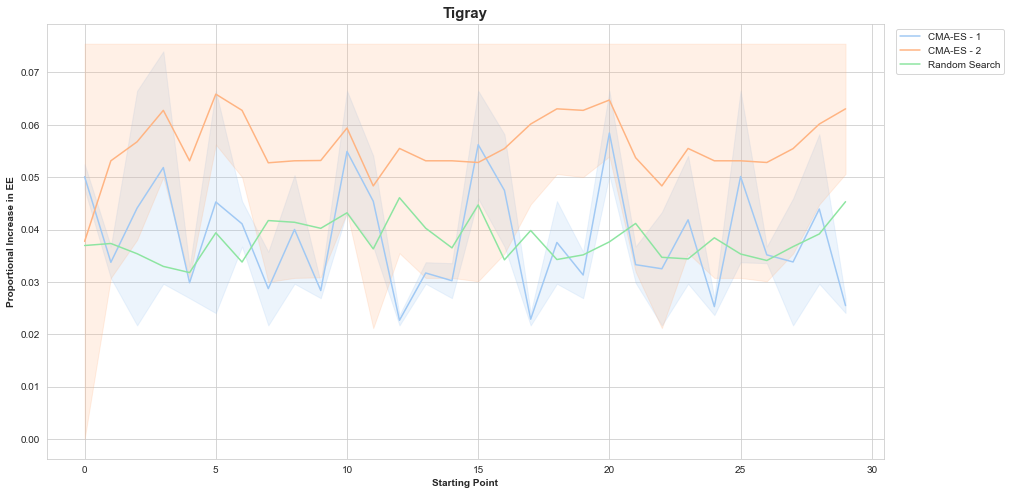

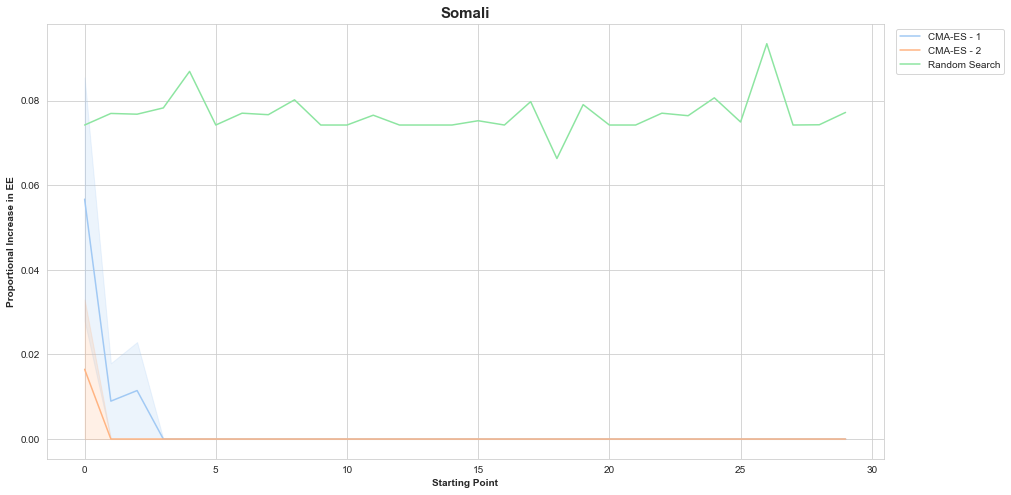

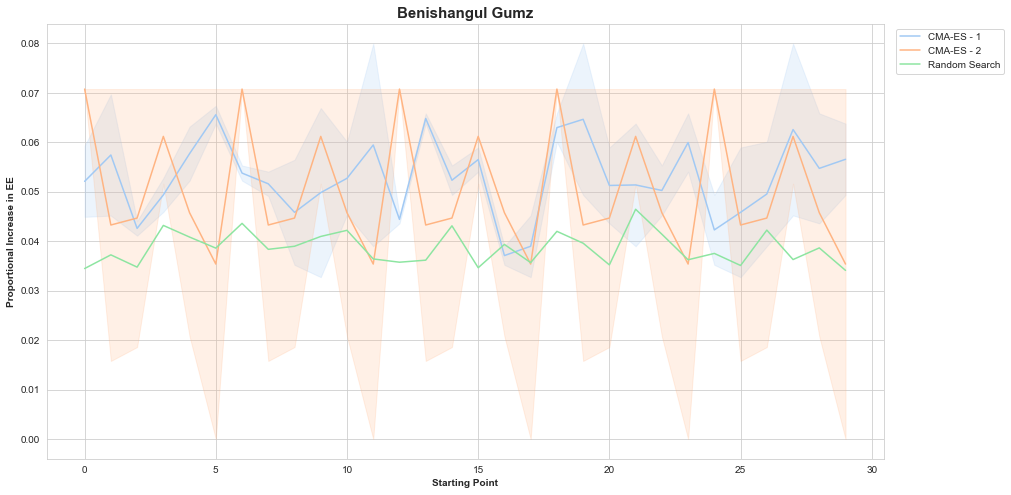

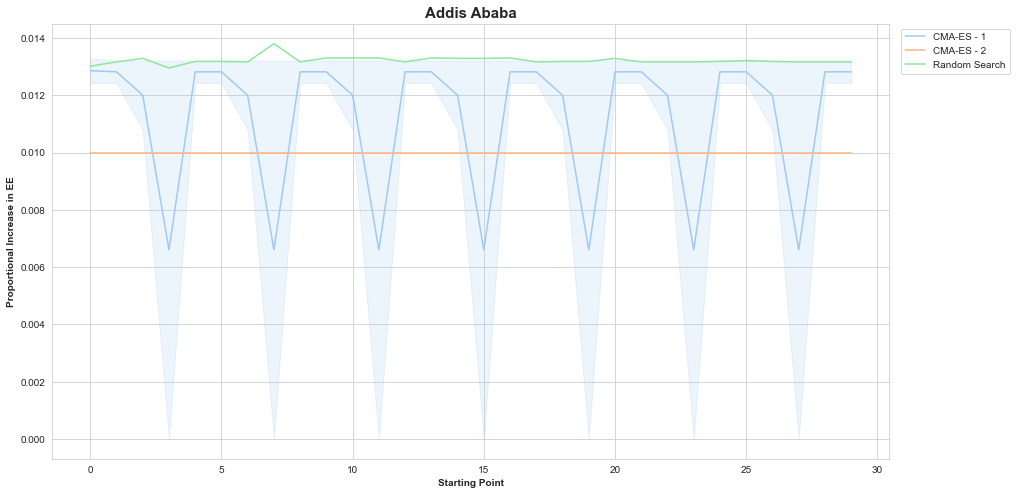

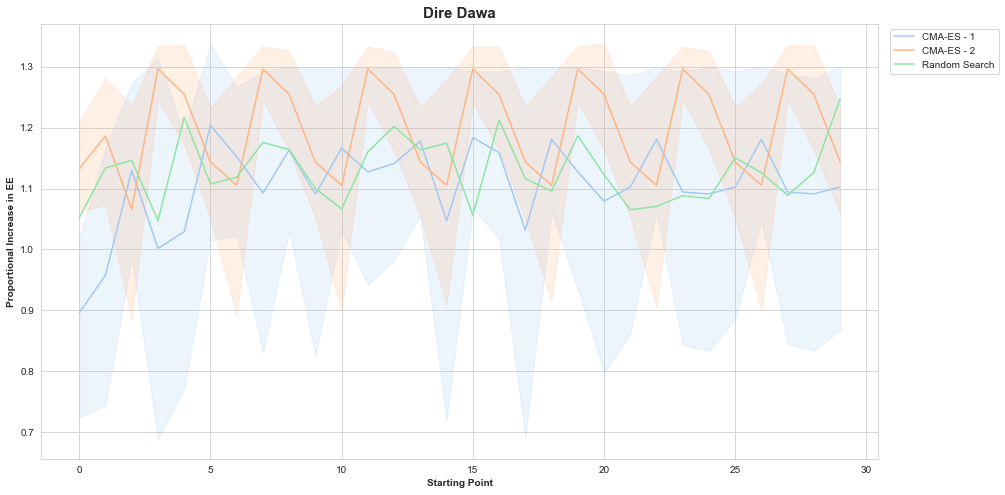

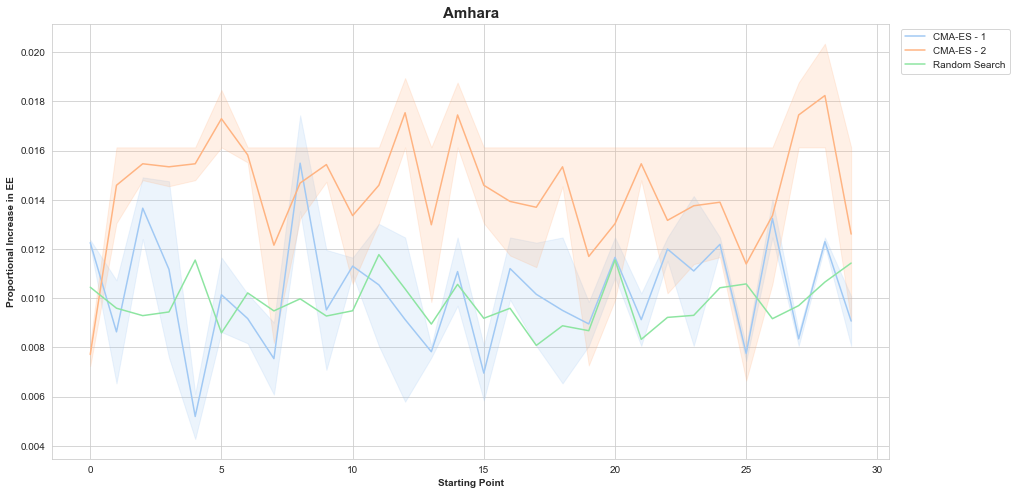

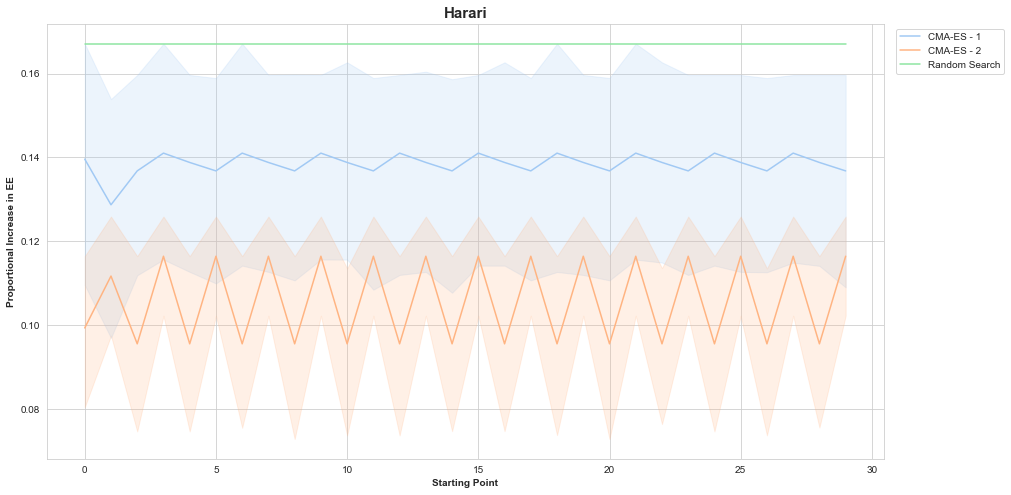

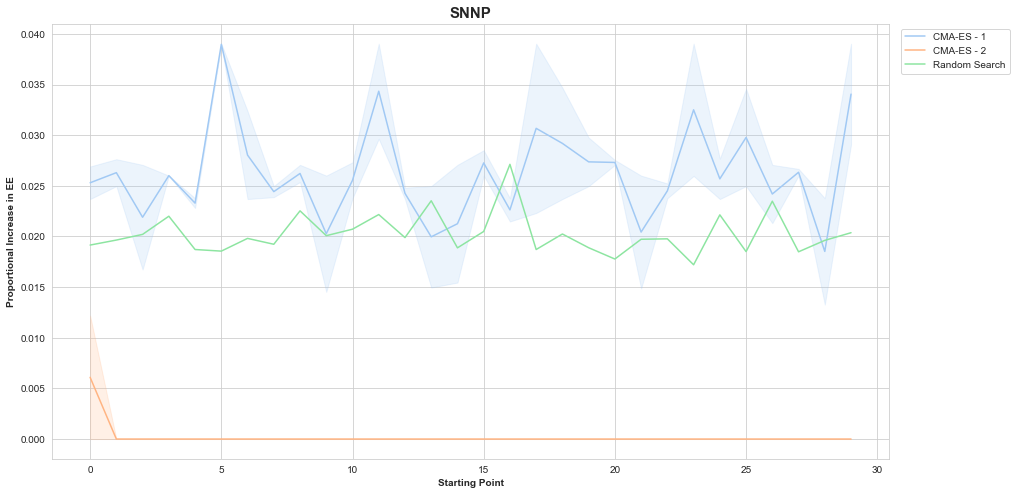

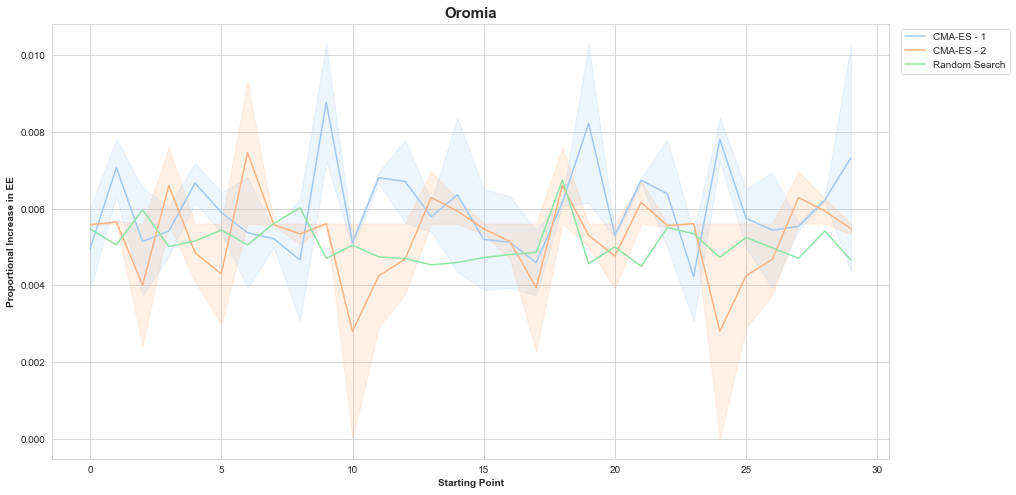

In [150]:
for i in set(df_sp['region']):
    sns.set_style("whitegrid")
    # Change default palette
    sns.set_palette('pastel')
    plt.figure(figsize=(15,8))
    fig = sns.lineplot(data=df_sp[df_sp['region']==i],  y="ee_dif", x='starting_point', hue='algorithm')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.xlabel("Starting Point", fontweight='bold')
    plt.ylabel("Proportional Increase in EE", fontweight='bold')
    plt.title(i, fontsize=15, fontweight='bold') # You can comment this line out if you don't need title
    plt.show()
    

In [151]:
cma_5_sigmas

,region,algorithm,sigma,relative_dif_sigma,counts
0,Addis Ababa,CMA-ES - 2,0.078358,-0.2,30
1,Addis Ababa,CMA-ES - 2,0.088152,-0.1,30
2,Amhara,CMA-ES - 2,0.477390,-0.1,29
3,Benishangul Gumz,CMA-ES - 2,0.337859,-0.6,30
4,Dire Dawa,CMA-ES - 2,0.028045,-0.7,7
5,Dire Dawa,CMA-ES - 2,0.037393,-0.6,7
6,Dire Dawa,CMA-ES - 2,0.046741,-0.5,7
7,Dire Dawa,CMA-ES - 2,0.056089,-0.4,15
8,Dire Dawa,CMA-ES - 2,0.065437,-0.3,7
9,Dire Dawa,CMA-ES - 2,0.074786,-0.2,14


In [152]:
# Find best sigma values. If multiple have same count, select one. 
best_sigma_cma1 = cma1_5_sigmas.sort_values('counts').groupby(['region'])[['region','sigma']].tail(1)
best_sigma_cma2 = cma_5_sigmas.sort_values('counts').groupby(['region'])[['region','sigma']].tail(1)
best_sigma_cma1.to_csv('best_sigma_cma1.csv')
best_sigma_cma2.to_csv('best_sigma_cma2.csv')

In [153]:
best_sigma_cma1

,region,sigma
0,Addis Ababa,0.045941
18,Somali,0.228912
1,Amhara,0.143655
2,Benishangul Gumz,0.789055
16,Oromia,0.448541
17,SNNP,0.975340
19,Tigray,0.740444
3,Dire Dawa,0.030970
15,Harari,0.063292


In [154]:
# Find best relative sigma value. Could be used in an extension of the program. 
cma1_5_sigmas['relative_dif_sigma'] = round(cma1_5_sigmas['relative_dif_sigma'],1)
best_s_relative1 = cma1_5_sigmas['relative_dif_sigma'].value_counts().head(1).index[0]
cma_5_sigmas['relative_dif_sigma'] = round(cma_5_sigmas['relative_dif_sigma'],1)
best_s_relative2 = cma_5_sigmas['relative_dif_sigma'].value_counts().head(1).index[0]
df_std1 = df[df['algorithm']=='CMA-ES - 1'].groupby(['region', 'algorithm'])['std'].unique()
df_std2 = df[df['algorithm']=='CMA-ES - 2'].groupby(['region', 'algorithm'])['std'].unique()

## Next step: multiply STD by best relative df sigma. 

## 4. Prepare final dataset

In [155]:
df2 = df.copy()

In [156]:
def get_admin_code(xx):
    arr = []
    for i in xx:
        for j in range(1, i+1):
            arr.append(j)
    return arr

In [157]:
def clean_final_dataset(dft, n):
    # Clean up coordinates.
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace('  ', ' ', regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace(' ', ',', regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace('\[,', '[', regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace(',]', ']', regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace(',\[', '[', regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace("'\[", "", regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace("\[\[", "[", regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace("]]", "]", regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.replace(",,", ",", regex=True)
    dft['proposed_locations'] = dft.loc[:,'proposed_locations'].str.split('\n')
    dft = dft[dft.loc[:,'proposed_schools_n'] <=5].reset_index(drop=True)
    df_best = dft.iloc[dft.groupby('region')['ee'].agg(pd.Series.idxmax)]
    df_best = df_best[['region','proposed_locations']].explode(column='proposed_locations')
    df_best['proposed_locations'] = df_best['proposed_locations'].apply(eval).apply(np.array)
    df3 = df_best['proposed_locations'].apply(pd.Series)
    df3.columns = ['lat', 'lon']
    df_best['lat'] = df3['lat']
    df_best['lon'] = df3['lon']
    df_best = df_best.reset_index(drop=True)
    admin = dft.groupby(['region'])['proposed_schools_n'].unique()
    xx = [i[0] for i in admin]
    admin_code = get_admin_code(xx)
    df_best['admin_code'] = admin_code
    return df_best

In [158]:
clean_df_5 = clean_final_dataset(df2, 5)

##### Find Correct Zone and Woreda of New Schools

In [159]:
gdf_zone = gpd.read_file('eth_shape_files/json//eth_admin2v2.json')
gdf_woreda = gpd.read_file('eth_shape_files/json//eth_admin3v2.json')

In [160]:
def check_zone(foo, gdf):
    count = 0
    while count < len(gdf):
        test = foo['geometry'].within(gdf['geometry'].iloc[count])
        if test == True:
            new_zone = gdf['ADM2_EN'].iloc[count]
            return new_zone
        else:
            count +=1
            
def check_woreda(foo, gdf):
    count = 0
    while count < len(gdf):
        test = foo['geometry'].within(gdf['geometry'].iloc[count])
        if test == True:
            new_woreda = gdf['ADM3_EN'].iloc[count]
            return new_woreda
        else:
            count +=1

In [161]:
def find_zone_woreda(dft):
    x = gpd.GeoDataFrame(
        dft, geometry=gpd.points_from_xy(dft.lon,dft.lat))
    x['ADM2_EN'] = ''
    x['ADM3_EN'] = ''
    
    # Run function on all GPS coordinates in dataset for zone

    i = 0
    while i < len(x):
            bb = check_zone(x.iloc[i], gdf_zone)
            x.loc[i, 'ADM2_EN'] = bb
            i +=1

    # Run function on all GPS coordinates in dataset for woreda

    i = 0
    while i < len(x):
            bb = check_woreda(x.iloc[i], gdf_woreda)
            x.loc[i, 'ADM3_EN'] = bb
            i +=1
            
    x = x.rename(columns={'region': 'ADM1_EN', 'proposed_locations':'point'})
    
    return x

In [162]:
clean_df_5 = find_zone_woreda(clean_df_5)

In [163]:
clean_df_5

,ADM1_EN,point,lat,lon,admin_code,geometry,ADM2_EN,ADM3_EN
0,Addis Ababa,"[9.067488, 38.872753]",9.067488,38.872753,1,POINT (38.87275 9.06749),Region 14,Yeka
1,Addis Ababa,"[8.998435, 38.680897]",8.998435,38.680897,2,POINT (38.68090 8.99844),Region 14,Kolfe - Keran
2,Addis Ababa,"[8.9201355, 38.734413]",8.920136,38.734413,3,POINT (38.73441 8.92014),Region 14,Nefas Silk
3,Addis Ababa,"[9.017342, 38.8968]",9.017342,38.896800,4,POINT (38.89680 9.01734),Region 14,Bole
4,Addis Ababa,"[8.95619, 38.6793]",8.956190,38.679300,5,POINT (38.67930 8.95619),Region 14,Kolfe - Keran
5,Amhara,"[12.00601192, 36.91033174]",12.006012,36.910332,1,POINT (36.91033 12.00601),Central Gondar,Alfa
6,Amhara,"[11.41363829, 37.13728022]",11.413638,37.137280,2,POINT (37.13728 11.41364),West Gojam,Mecha
7,Amhara,"[12.14551034, 38.03668029]",12.145510,38.036680,3,POINT (38.03668 12.14551),South Gondar,Ebenat
8,Amhara,"[12.39552382, 37.54063903]",12.395524,37.540639,4,POINT (37.54064 12.39552),Central Gondar,Gonder Zuria
9,Amhara,"[11.99416306, 36.85548536]",11.994163,36.855485,5,POINT (36.85549 11.99416),Central Gondar,Alfa


## Get Expected Enrolment Per New School

In [164]:
def shape(distance, enrollment):
    """ Returns the expected enrollment based on distance.    
    """
    min_walk = 3 # minimum km walking distance
    max_walk = 5 # maximum km walking distance
    shaped_enroll = np.where(distance < min_walk, enrollment,
             np.where(distance>max_walk, 0, enrollment*(1-(distance-min_walk)/(max_walk-min_walk))))
    return shaped_enroll

In [165]:
def get_expected_enrolment(df_best):
    # Clean data
    x_loc = df_best['point'].reset_index(drop=True).to_numpy()
    x_loc = np.array([np.array(i) for i in x_loc], dtype=float) # 2
    df_middle = df_.loc[df_['grade_7_8'] > 0]
    df_middle_enroll = df_middle['grade_7_8'].reset_index(drop=True).to_numpy(dtype=float) # 1
    df_middle_loc = df_middle['point'].reset_index(drop=True).to_numpy()
    df_middle_loc = np.array([np.array(i) for i in df_middle_loc], dtype=float) # 2
    current_ms_distance = df_middle['nearest_lwr_sec'].to_numpy() # 5
    d = haversine_vector(df_middle_loc,x_loc, Unit.KILOMETERS, comb=True) # distance of MS to x. 
    d_min = np.min(d, axis=0) # select only closest schools to avoid duplication. 
    d_index = np.argmin(d, axis=0) # index of min distance of MS to x
    d2 = np.where((d_min <5) & (d_min < current_ms_distance)) # limit to only schools < 5km and schools < current distance
    # Put into dataframe for manipulation in pandas
    # index 0 = x, index 1 = MS, index 2 = distance, index 3 = shaped enrollment 
    d3 = pd.DataFrame(np.vstack((d_index[d2], d2[0], d_min[d2], shape(d_min[d2], df_middle_enroll[d2[0]]))).T) 
    d32 = d3.loc[d3.groupby([1])[2].idxmin()] # find only nearby SS if MS is close to more than 1 SS.
    d32 = d32.groupby(0)[3].sum() # The overall shaped enrollment for each school in x.
    df_best['grade9_10'] = round(d32,0)
    df_best['gr_offer'] = 'G. 9-10'
    return df_best

In [166]:
clean_df_5_2 = get_expected_enrolment(clean_df_5)

In [167]:
best_5 = clean_df_5_2.copy()

# Plot Full Solution

In [168]:
df_middle = df_.loc[df_['grade_7_8'] > 0].reset_index(drop=True) # Filter to MS only
df_middle_enroll = df_middle['grade_7_8'].reset_index(drop=True).to_numpy(dtype=float) # Convert MS Enrolment to np
df_middle_loc = df_middle['point'].reset_index(drop=True).to_numpy()
df_middle_loc = np.array([np.array(i) for i in df_middle_loc], dtype=float) # Convert MS locational data to np.

In [169]:
df_sec = df_.loc[ (df_['gr_offer'] == 'G. 9-10') | (df_['gr_offer'] == 'G. 9-12')]
df_sec_enroll = df_sec['grade9_10'].reset_index(drop=True).to_numpy(dtype=float) # 4
df_sec_loc = df_sec['point'].reset_index(drop=True).to_numpy() 
df_sec_loc = np.array([np.array(i) for i in df_sec_loc], dtype=float) # 5

In [170]:
df_new_enroll = np.nan_to_num(best_5['grade9_10'].reset_index(drop=True).to_numpy(dtype=float)) # Convert MS Enrolment to np
df_new_loc = best_5['point'].reset_index(drop=True).to_numpy()
df_new_loc = np.array([np.array(i) for i in df_new_loc], dtype=float) # Conve

In [171]:
np.sum(df_new_enroll)

47279.0

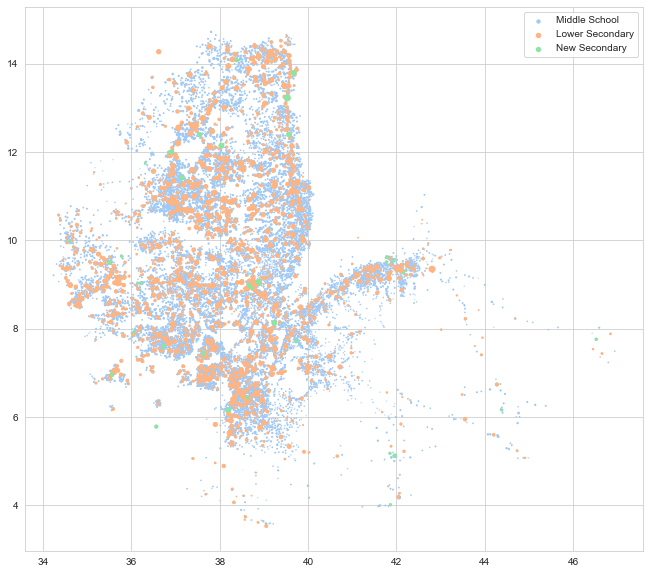

In [172]:
# it is latitude then longitude.
plt.figure(figsize=(15, 10))
plt.scatter(df_middle_loc[:, 1], df_middle_loc[:, 0], s=df_middle_enroll/100, label="Middle School") # s gives size
plt.scatter(df_sec_loc[:, 1], df_sec_loc[:, 0], s=df_sec_enroll/100, label="Lower Secondary") # s gives size
plt.scatter(df_new_loc[:, 1], df_new_loc[:, 0], s = df_new_enroll/100, marker="o", label="New Secondary") # stars for supermarkets
plt.gca().set_aspect('equal')
plt.legend()
plt.show()